In [4]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score  # Metrics ke liye

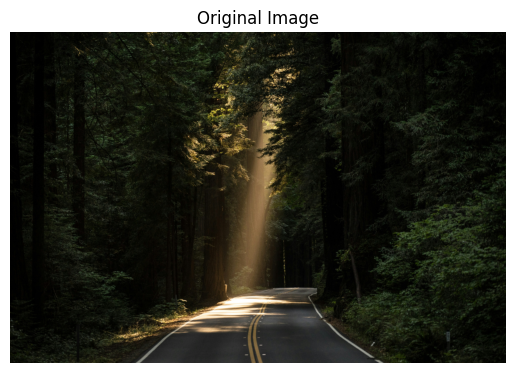

In [5]:
# Image load karo
photo = cv2.imread('image.jpg')  # Apni image ka path daalo
photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)  # BGR se RGB mein convert

# Check karo image load hui ya nahi
plt.imshow(photo)
plt.title("Original Image")
plt.axis('off')
plt.show()

<!-- Part 3: Pixels Ko Reshape Karo -->

<!-- Part 3: Pixels Ko Reshape Karo
 -->

#Part 3: Pixels Ko Reshape Karo

In [6]:
# Pixels ko reshape karo
pixels = photo.reshape(-1, 3)  # Har pixel ek row, 3 columns (R, G, B)

# Pixels ka shape dekho
print("Pixels ka shape:", pixels.shape)

Pixels ka shape: (11186176, 3)


##apply clustring

In [7]:
k = 5  # Kitne colors chahiye
kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)
main_colors = kmeans.cluster_centers_.astype(int)
labels = kmeans.labels_

# Metrics calculate karo
inertia = kmeans.inertia_  # Inertia (within-cluster sum of squares)
# silhouette = silhouette_score(pixels, labels) if k > 1 else None  # Silhouette score (k>1 ke liye)
db_index = davies_bouldin_score(pixels, labels) if k > 1 else None  # Davies-Bouldin index

# Results print karo
print("Dominant Colors (RGB):", main_colors)
print(f"Inertia (Lower is better): {inertia:.2f}")
# print(f"Silhouette Score (-1 to 1, Higher is better): {silhouette:.3f}" if silhouette else "Silhouette not applicable for k=1")
print(f"Davies-Bouldin Index (Lower is better): {db_index:.3f}" if db_index else "DB Index not applicable for k=1")

Dominant Colors (RGB): [[ 27  29  17]
 [131 110  73]
 [  7   8   3]
 [ 58  58  40]
 [237 216 176]]
Inertia (Lower is better): 2855535162.92
Davies-Bouldin Index (Lower is better): 0.617


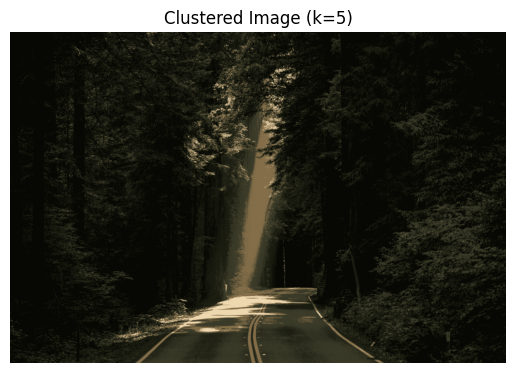

In [8]:
# Clustered image banao
labels = kmeans.labels_  # Har pixel ka cluster number
clustered_image = main_colors[labels].reshape(photo.shape).astype(np.uint8)

# Clustered image dekho
plt.imshow(clustered_image)
plt.title(f"Clustered Image (k={k})")
plt.axis('off')
plt.show()

In [9]:
from sklearn.decomposition import PCA  # Scatter plot ke liye PCA
# Pixel count har cluster ke liye (Pie chart ke liye)
cluster_counts = np.bincount(labels, minlength=k)
percentages = cluster_counts / cluster_counts.sum() * 100

# Scatter plot ke liye PCA (RGB ko 2D mein convert)
pca = PCA(n_components=2)
pixels_2d = pca.fit_transform(pixels)

In [10]:
pixels_2d



array([[-35.03088141,  -2.09317607],
       [-38.45374299,  -1.56109578],
       [-40.16517378,  -1.29505563],
       ...,
       [-24.79287159,  -0.33750907],
       [-26.50430238,  -0.07146892],
       [-26.50430238,  -0.07146892]])

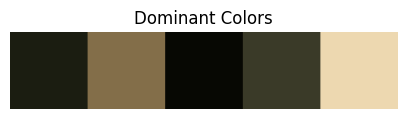

In [11]:
# Dominant colors plot karo
plt.figure(figsize=(5, 2))
color_swatches = np.zeros((100, k * 100, 3), dtype=np.uint8)  # Blank image for swatches
for i in range(k):
    color_swatches[:, i * 100:(i + 1) * 100] = main_colors[i]  # Har color ka block
plt.imshow(color_swatches)
plt.title("Dominant Colors")
plt.axis('off')
plt.show()

(-0.5, 499.5, 99.5, -0.5)

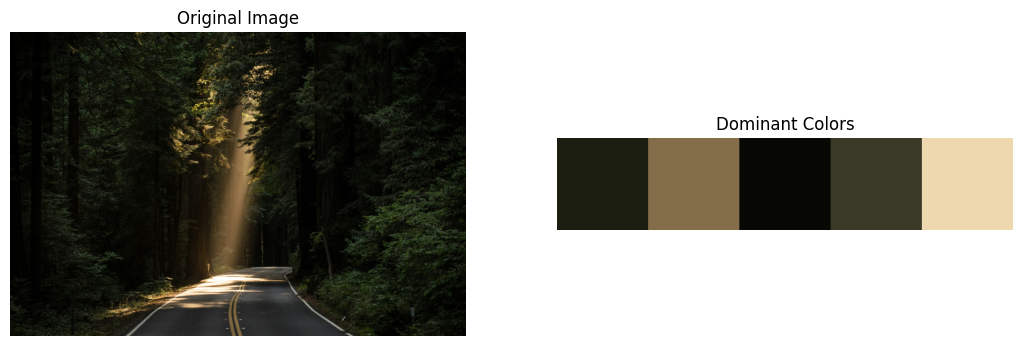

In [12]:
plt.figure(figsize=(20, 12))  # Thoda bada size taaki sab fit ho

# Plot 1: Original Image
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(photo)
plt.axis('off')

# Plot 2: Dominant Colors Swatches
plt.subplot(2, 3, 2)
plt.title("Dominant Colors")
color_swatches = np.zeros((100, k * 100, 3), dtype=np.uint8)
for i in range(k):
    color_swatches[:, i * 100:(i + 1) * 100] = main_colors[i]
plt.imshow(color_swatches)
plt.axis('off')

(-1.0999996364758136,
 1.0999999826893245,
 -1.0999994016093826,
 1.0999997485810187)

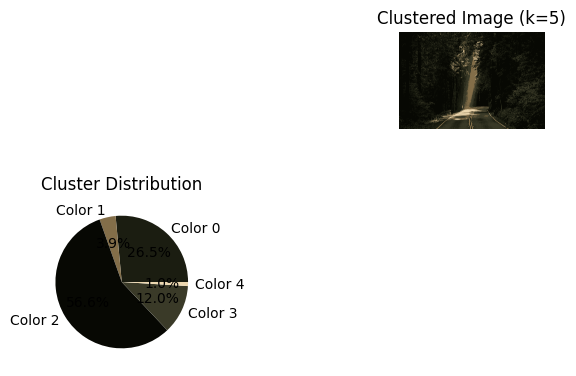

In [14]:
# Plot 3: Clustered Image
plt.subplot(2, 3, 3)
plt.title(f"Clustered Image (k={k})")
plt.imshow(clustered_image)
plt.axis('off')

# Plot 4: Pie Chart (Cluster Percentages)
plt.subplot(2, 3, 4)
plt.title("Cluster Distribution")
plt.pie(percentages, labels=[f"Color {i}" for i in range(k)], colors=main_colors/255, autopct='%1.1f%%')
plt.axis('equal')

Text(0, 0.5, 'PCA Component 2')

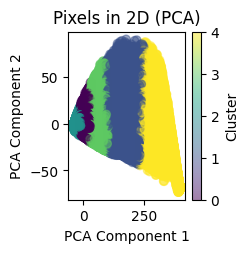

In [15]:
# Plot 5: Scatter Plot (Pixels in 2D)
plt.subplot(2, 3, 5)
plt.title("Pixels in 2D (PCA)")
scatter = plt.scatter(pixels_2d[:, 0], pixels_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

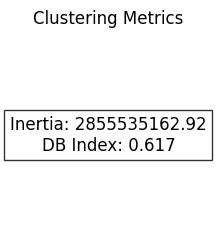

In [16]:
# Plot 6: Metrics Display (Text Box)
plt.subplot(2, 3, 6)
plt.title("Clustering Metrics")
plt.axis('off')  # No axes needed
metrics_text = (f"Inertia: {inertia:.2f}\n"
                f"DB Index: {db_index:.3f}")
plt.text(0.5, 0.5, metrics_text, fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout aur show
plt.tight_layout()
plt.show()